In [1]:
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")
sns.set_context("notebook")
import pyreadr
from copy import deepcopy, copy
import matplotlib.pyplot as plt

In [2]:
dir_path = "Z:/JulietteG/6-Etutes_Antares/ERAA_sim/user/"

# At00

In [3]:
area = "2_at00_hydro_open"

## Gain

In [38]:
reward = pyreadr.read_r(dir_path+"reward_"+area+".RData")["df_reward"]

In [39]:
reward["Simulations"] = reward["method"].apply(lambda x:int(x.split("sim_")[0]))
reward["Interpolation"] = reward["method"].apply(lambda x:"Basic" if x.split("sim_")[1]=="old" else "Marginal prices")
reward["reward"] = reward["reward"]/1e6
reward["control"] = reward["control"]/1000
reward.rename(columns={'mcYear': 'Scenario', 'timeId': 'Week', 'reward':'Reward (M euros)','control':"Control (GWh)"}, inplace=True)
reward.sort_values(by=["Scenario","Week","Simulations"],inplace=True)
reward["Simulations"] = reward["Simulations"].apply(lambda x:str(x))

In [40]:
reward

,Scenario,Week,Reward (M euros),Control (GWh),method,Simulations,Interpolation
38480,1,1.0,-41.211112,-322.182,1sim_new,1,Marginal prices
38481,1,1.0,-38.962478,-307.537,1sim_new,1,Marginal prices
38482,1,1.0,-36.714884,-292.893,1sim_new,1,Marginal prices
38483,1,1.0,-34.485624,-278.248,1sim_new,1,Marginal prices
38484,1,1.0,-32.283607,-263.603,1sim_new,1,Marginal prices
...,...,...,...,...,...,...,...
10395,10,52.0,24.029073,267.059,20sim_old,20,Basic
10396,10,52.0,24.159570,305.210,20sim_old,20,Basic
10397,10,52.0,24.160161,343.361,20sim_old,20,Basic
10398,10,52.0,24.160458,381.513,20sim_old,20,Basic


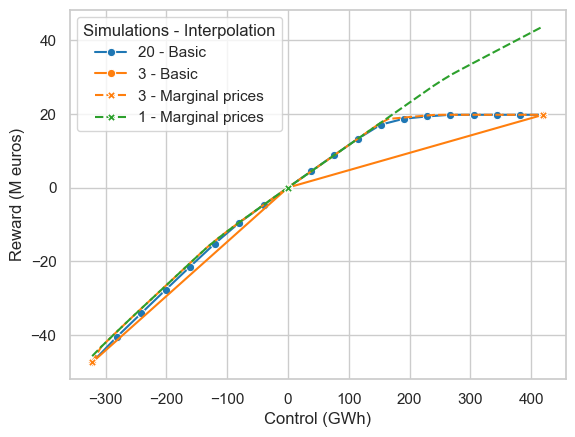

In [41]:
ax = sns.lineplot(x="Control (GWh)",y="Reward (M euros)",data=reward[(reward.Week>=9)&(reward.Week<=9)&(reward.Scenario==1)],hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices"],hue_order=['20','3','1'],markers=True)
lines = ax.get_lines()

lines[2].set_markevery([0,22,50])
lines[3].set_markevery([22])

# create a dictionary mapping the subscales to their color
handles, labels = ax.get_legend_handles_labels()
index_item_title = labels.index('Interpolation')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

new_handle = [copy(handles[index_item_title+1]),
              copy(handles[index_item_title+1]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+2])]
new_handle[0].set_color(color_dict['20'])
new_handle[1].set_color(color_dict['3'])
new_handle[2].set_color(color_dict['3'])
new_handle[3].set_color(color_dict['1'])
new_label = ["20 - Basic","3 - Basic", "3 - Marginal prices", "1 - Marginal prices"]
# create a legend only using the items
ax.legend(new_handle, new_label, title='Simulations - Interpolation')

## Vu

In [24]:
vu = pyreadr.read_r(dir_path+"vu_"+area+".RData")["df_vu"]
vu.drop(columns=["statesid","value_node","value_node_dif","states_dif","vu_pen"],inplace=True)
vu_simple = pyreadr.read_r(dir_path+"vu_simple_"+area+".RData")['watervalues']
vu_simple.drop(columns=["statesid","mean","std","vu_pen"],inplace=True)
vu_simple["method"] = "simple"
vu = pd.concat([vu,vu_simple])

In [25]:
vu["Simulations"] = vu["method"].apply(lambda x:int(x.split("sim_")[0]) if x!="simple" else 1)
vu["Interpolation"] = vu["method"].apply(lambda x:"No DP" if x=="simple" else ("Basic" if x.split("sim_")[1]=="old" else "Marginal prices"))
vu.rename(columns={'weeks': 'Week', 'vu':'Water value (euros/MWh)','states':"Level (%)"}, inplace=True)
vu.sort_values(by=["Week","Simulations"],inplace=True)
vu["Simulations"] = vu["Simulations"].apply(lambda x:str(x))
capacity = max(vu["Level (%)"])
vu["Level (%)"] = vu["Level (%)"]/capacity*100
vu["level_high"] = vu["level_high"]/capacity*100
vu["level_low"] = vu["level_low"]/capacity*100

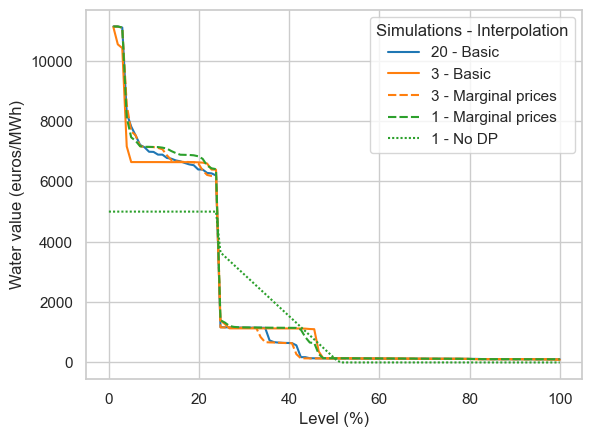

In [37]:
ax = sns.lineplot(x="Level (%)",y="Water value (euros/MWh)",data=vu[(vu.Week>=3)&(vu.Week<=3)].dropna(),hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices","No DP"],hue_order=['20','3','1'])

# create a dictionary mapping the subscales to their color
handles, labels = ax.get_legend_handles_labels()
index_item_title = labels.index('Interpolation')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

new_handle = [copy(handles[index_item_title+1]),
              copy(handles[index_item_title+1]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+3])]
new_handle[0].set_color(color_dict['20'])
new_handle[1].set_color(color_dict['3'])
new_handle[2].set_color(color_dict['3'])
new_handle[3].set_color(color_dict['1'])
new_handle[4].set_color(color_dict['1'])
new_label = ["20 - Basic","3 - Basic", "3 - Marginal prices", "1 - Marginal prices", "1 - No DP"]
# create a legend only using the items
ax.legend(new_handle, new_label, title='Simulations - Interpolation')

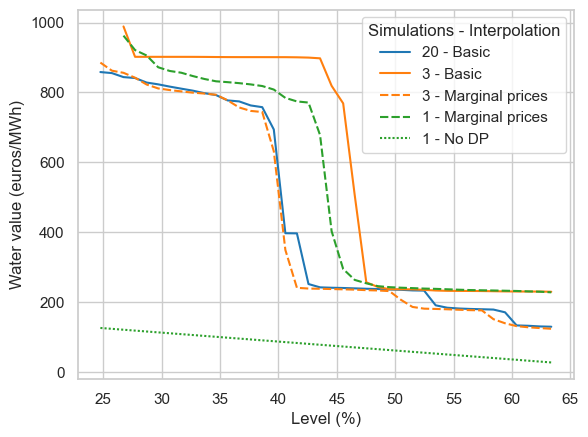

In [39]:
ax = sns.lineplot(x="Level (%)",y="Water value (euros/MWh)",data=vu[(vu.Week>=2)&(vu.Week<=2)&(vu["Level (%)"]>=vu.level_low)&(vu["Level (%)"]<=vu.level_high)&(vu["Water value (euros/MWh)"] < 1000)].dropna(),hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices","No DP"],hue_order=['20','3','1'])
# create a dictionary mapping the subscales to their color
handles, labels = ax.get_legend_handles_labels()
index_item_title = labels.index('Interpolation')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

new_handle = [copy(handles[index_item_title+1]),
              copy(handles[index_item_title+1]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+3])]
new_handle[0].set_color(color_dict['20'])
new_handle[1].set_color(color_dict['3'])
new_handle[2].set_color(color_dict['3'])
new_handle[3].set_color(color_dict['1'])
new_handle[4].set_color(color_dict['1'])
new_label = ["20 - Basic","3 - Basic", "3 - Marginal prices", "1 - Marginal prices", "1 - No DP"]
# create a legend only using the items
ax.legend(new_handle, new_label, title='Simulations - Interpolation')

## Test en simulation

In [42]:
level = pd.read_excel(dir_path+"level_"+area+".xlsx")

In [43]:
level = level.loc[level.timeId==8736,["mcYear","level","H. VAL","name_sim"]]
level.rename(columns={'name_sim': 'name'}, inplace=True)

In [44]:
result = pd.read_excel(dir_path+"coûts_"+area+".xlsx")

In [45]:
result = pd.merge(result,level,on=["mcYear","name"])
result["level_cost"] = 5000*abs(result["level"]-45)*capacity
result["Cost (G euros)"] = result["ov_cost"]/1e9#+result["level_cost"]
result["method"] = result["name"].apply(lambda x:x.split(area+"_")[1] if area in x else "simple")
result["Simulations"] = result["method"].apply(lambda x:int(x.split("sim_")[0]) if x!="simple" else 1)
result["Interpolation"] = result["method"].apply(lambda x:"No DP" if x=="simple" else ("Basic" if x.split("sim_")[1]=="old" else "Marginal prices"))
result.rename(columns={'mcYear': 'Scenario','level':'Final level (%)'}, inplace=True)
result["Simulations"] = result["Simulations"].apply(lambda x:str(x))
result.drop(columns=["name","unsp_cost"],inplace=True)

In [46]:
result.head(10)

,Scenario,ov_cost,Final level (%),H. VAL,level_cost,Cost (G euros),method,Simulations,Interpolation
0,1,199661392995,45.0,-7802.61,0.0,199.661393,1sim_new,1,Marginal prices
1,2,192581071139,45.0,-5845.82,0.0,192.581071,1sim_new,1,Marginal prices
2,3,194611698878,45.0,-7613.07,0.0,194.611699,1sim_new,1,Marginal prices
3,4,242798242681,45.0,-7613.23,0.0,242.798243,1sim_new,1,Marginal prices
4,5,206718059000,45.0,-6362.59,0.0,206.718059,1sim_new,1,Marginal prices
5,6,220133255462,45.0,-7620.98,0.0,220.133255,1sim_new,1,Marginal prices
6,7,190915410615,45.0,-7802.58,0.0,190.915411,1sim_new,1,Marginal prices
7,8,199851386882,45.0,-7802.63,0.0,199.851387,1sim_new,1,Marginal prices
8,9,197090919960,45.0,-7664.84,0.0,197.090920,1sim_new,1,Marginal prices
9,10,207521566185,45.0,-7617.53,0.0,207.521566,1sim_new,1,Marginal prices


In [49]:
result_mean = result.loc[:,["method","Cost (G euros)","Final level (%)"]].groupby("method").mean().reset_index()
result_mean["Simulations"] = result_mean["method"].apply(lambda x:x.split("sim_")[0] if x!="simple" else "1")
result_mean["Interpolation"] = result_mean["method"].apply(lambda x:"No DP" if x=="simple" else ("Basic" if x.split("sim_")[1]=="old" else "Marginal prices"))

In [50]:
result_mean

,method,Cost (G euros),Final level (%),Simulations,Interpolation
0,1sim_new,205.188300,45.000,1,Marginal prices
1,20sim_old,205.172121,44.900,20,Basic
2,3sim_new,205.173495,44.781,3,Marginal prices
3,3sim_old,205.180417,45.000,3,Basic
4,simple,205.491188,45.000,1,No DP


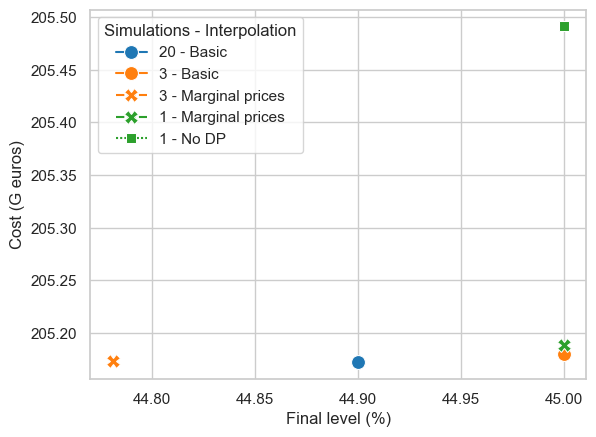

In [51]:
ax = sns.lineplot(x="Final level (%)",y="Cost (G euros)",data=result_mean,hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices","No DP"],hue_order=['20','3','1'],markers=True,markersize=10)

# create a dictionary mapping the subscales to their color
handles, labels = ax.get_legend_handles_labels()
index_item_title = labels.index('Interpolation')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

new_handle = [copy(handles[index_item_title+1]),
              copy(handles[index_item_title+1]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+3])]
new_handle[0].set_color(color_dict['20'])
new_handle[1].set_color(color_dict['3'])
new_handle[2].set_color(color_dict['3'])
new_handle[3].set_color(color_dict['1'])
new_handle[4].set_color(color_dict['1'])
new_label = ["20 - Basic","3 - Basic", "3 - Marginal prices", "1 - Marginal prices", "1 - No DP"]
# create a legend only using the items
ax.legend(new_handle, new_label, title='Simulations - Interpolation')


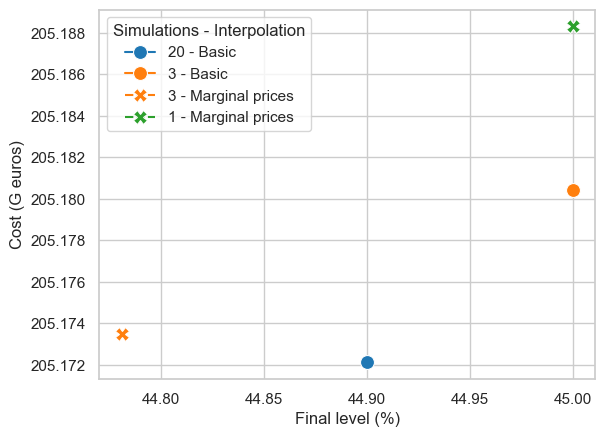

In [53]:
ax = sns.lineplot(x="Final level (%)",y="Cost (G euros)",data=result_mean,hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices"],hue_order=['20','3','1'],markers=True,markersize=10)
ax.ticklabel_format(useOffset=False)

# create a dictionary mapping the subscales to their color
handles, labels = ax.get_legend_handles_labels()
index_item_title = labels.index('Interpolation')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

new_handle = [copy(handles[index_item_title+1]),
              copy(handles[index_item_title+1]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+2])]
new_handle[0].set_color(color_dict['20'])
new_handle[1].set_color(color_dict['3'])
new_handle[2].set_color(color_dict['3'])
new_handle[3].set_color(color_dict['1'])
new_label = ["20 - Basic","3 - Basic", "3 - Marginal prices", "1 - Marginal prices"]
# create a legend only using the items
ax.legend(new_handle, new_label, title='Simulations - Interpolation')

# Nos0

In [3]:
area = "2_nos0_hydro_open"

## Gain

In [4]:
reward = pyreadr.read_r(dir_path+"reward_"+area+".RData")["df_reward"]

In [5]:
reward["Simulations"] = reward["method"].apply(lambda x:int(x.split("sim_")[0]))
reward["Interpolation"] = reward["method"].apply(lambda x:"Basic" if x.split("sim_")[1]=="old" else "Marginal prices")
reward["reward"] = reward["reward"]/1e6
reward["control"] = reward["control"]/1000
reward.rename(columns={'mcYear': 'Scenario', 'timeId': 'Week', 'reward':'Reward (M euros)','control':"Control (GWh)"}, inplace=True)
reward.sort_values(by=["Scenario","Week","Simulations"],inplace=True)
reward["Simulations"] = reward["Simulations"].apply(lambda x:str(x) if x!=21 else "20")

In [6]:
reward

,Scenario,Week,Reward (M euros),Control (GWh),method,Simulations,Interpolation
37440,1,1.0,-1706.880000,-128.016,1sim_new,1,Marginal prices
37441,1,1.0,0.000000,0.000,1sim_new,1,Marginal prices
37442,1,1.0,784.660242,78.466,1sim_new,1,Marginal prices
37443,1,1.0,1569.329638,156.933,1sim_new,1,Marginal prices
37444,1,1.0,2353.989879,235.399,1sim_new,1,Marginal prices
...,...,...,...,...,...,...,...
10395,10,52.0,8161.294454,2990.437,21sim_old,20,Basic
10396,10,52.0,8161.294662,3204.040,21sim_old,20,Basic
10397,10,52.0,8161.294351,3417.643,21sim_old,20,Basic
10398,10,52.0,8161.293908,3631.245,21sim_old,20,Basic


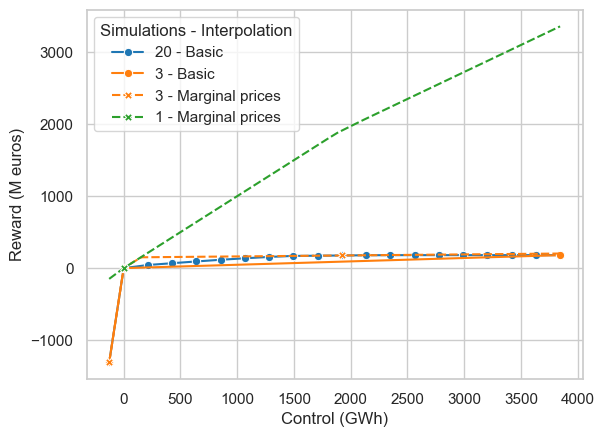

In [8]:
ax = sns.lineplot(x="Control (GWh)",y="Reward (M euros)",data=reward[(reward.Week>=26)&(reward.Week<=26)&(reward.Scenario==1)],hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices"],hue_order=['20','3','1'],markers=True)
lines = ax.get_lines()

lines[2].set_markevery([0,1,26])
lines[3].set_markevery([1])

# create a dictionary mapping the subscales to their color
handles, labels = ax.get_legend_handles_labels()
index_item_title = labels.index('Interpolation')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

new_handle = [copy(handles[index_item_title+1]),
              copy(handles[index_item_title+1]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+2])]
new_handle[0].set_color(color_dict['20'])
new_handle[1].set_color(color_dict['3'])
new_handle[2].set_color(color_dict['3'])
new_handle[3].set_color(color_dict['1'])
new_label = ["20 - Basic", "3 - Basic", "3 - Marginal prices", "1 - Marginal prices"]
# create a legend only using the items
ax.legend(new_handle, new_label, title='Simulations - Interpolation')

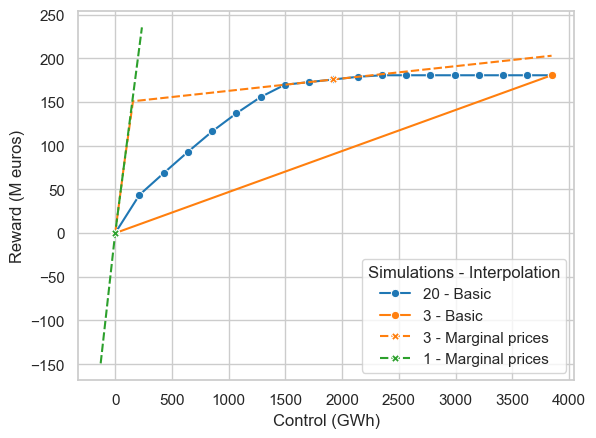

In [10]:
ax = sns.lineplot(x="Control (GWh)",y="Reward (M euros)",data=reward[(reward.Week>=26)&(reward.Week<=26)&(reward.Scenario==1)&(reward["Reward (M euros)"]<=3e2)&(reward["Reward (M euros)"]>=-3e2)],hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices"],hue_order=['20','3','1'],markers=True)
lines = ax.get_lines()

lines[2].set_markevery([0,25])
lines[3].set_markevery([1])

# create a dictionary mapping the subscales to their color
handles, labels = ax.get_legend_handles_labels()
index_item_title = labels.index('Interpolation')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

new_handle = [copy(handles[index_item_title+1]),
              copy(handles[index_item_title+1]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+2])]
new_handle[0].set_color(color_dict['20'])
new_handle[1].set_color(color_dict['3'])
new_handle[2].set_color(color_dict['3'])
new_handle[3].set_color(color_dict['1'])
new_label = ["20 - Basic", "3 - Basic", "3 - Marginal prices", "1 - Marginal prices"]
# create a legend only using the items
ax.legend(new_handle, new_label, title='Simulations - Interpolation')

## Vu

In [11]:
vu = pyreadr.read_r(dir_path+"vu_"+area+".RData")["df_vu"]
vu.drop(columns=["statesid","value_node","value_node_dif","states_dif","vu_pen"],inplace=True)
vu_simple = pyreadr.read_r(dir_path+"vu_simple_"+area+".RData")['watervalues']
vu_simple.drop(columns=["statesid","mean","std","vu_pen"],inplace=True)
vu_simple["method"] = "simple"
vu = pd.concat([vu,vu_simple])

In [12]:
vu["Simulations"] = vu["method"].apply(lambda x:int(x.split("sim_")[0]) if x!="simple" else 1)
vu["Interpolation"] = vu["method"].apply(lambda x:"No DP" if x=="simple" else ("Basic" if x.split("sim_")[1]=="old" else "Marginal prices"))
vu.rename(columns={'weeks': 'Week', 'vu':'Water value (euros/MWh)','states':"Level (%)"}, inplace=True)
vu.sort_values(by=["Week","Simulations"],inplace=True)
vu["Simulations"] = vu["Simulations"].apply(lambda x:str(x) if x!=21 else "20")
capacity = max(vu["Level (%)"])
vu["Level (%)"] = vu["Level (%)"]/capacity*100
vu["level_high"] = vu["level_high"]/capacity*100
vu["level_low"] = vu["level_low"]/capacity*100

In [13]:
vu

,Week,Level (%),level_low,level_high,Water value (euros/MWh),method,Simulations,Interpolation
10608,1.0,0.000000,75.7,75.7,NaN,1sim_new,1,Marginal prices
10609,1.0,0.990099,75.7,75.7,83367.90,1sim_new,1,Marginal prices
10610,1.0,1.980198,75.7,75.7,81549.27,1sim_new,1,Marginal prices
10611,1.0,2.970297,75.7,75.7,79872.81,1sim_new,1,Marginal prices
10612,1.0,3.960395,75.7,75.7,78332.20,1sim_new,1,Marginal prices
...,...,...,...,...,...,...,...,...
5095,53.0,3.960395,75.7,75.7,5000.00,simple,1,No DP
5147,53.0,2.970297,75.7,75.7,5000.00,simple,1,No DP
5199,53.0,1.980198,75.7,75.7,5000.00,simple,1,No DP
5251,53.0,0.990099,75.7,75.7,5000.00,simple,1,No DP


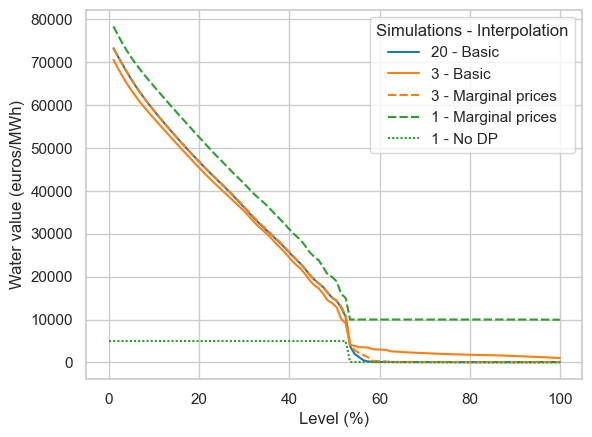

In [20]:
ax = sns.lineplot(x="Level (%)",y="Water value (euros/MWh)",data=vu[(vu.Week>=2)&(vu.Week<=2)].dropna(),hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices","No DP"],hue_order=['20','3','1'])

# create a dictionary mapping the subscales to their color
handles, labels = ax.get_legend_handles_labels()
index_item_title = labels.index('Interpolation')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

new_handle = [copy(handles[index_item_title+1]),
              copy(handles[index_item_title+1]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+3])]
new_handle[0].set_color(color_dict['20'])
new_handle[1].set_color(color_dict['3'])
new_handle[2].set_color(color_dict['3'])
new_handle[3].set_color(color_dict['1'])
new_handle[4].set_color(color_dict['1'])
new_label = ["20 - Basic", "3 - Basic", "3 - Marginal prices", "1 - Marginal prices", "1 - No DP"]
# create a legend only using the items
ax.legend(new_handle, new_label, title='Simulations - Interpolation')

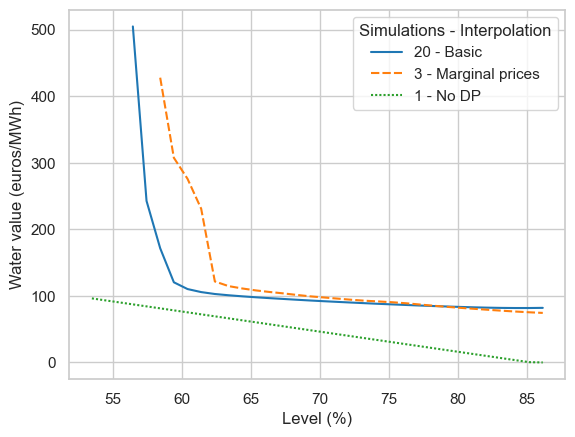

In [17]:
ax = sns.lineplot(x="Level (%)",y="Water value (euros/MWh)",data=vu[(vu.Week>=2)&(vu.Week<=2)&(vu["Level (%)"]>=vu.level_low)&(vu["Level (%)"]<=vu.level_high)&(vu["Water value (euros/MWh)"]< 1200)].dropna(),hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices","No DP"],hue_order=['20','3','1'])

# create a dictionary mapping the subscales to their color
handles, labels = ax.get_legend_handles_labels()
index_item_title = labels.index('Interpolation')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

new_handle = [copy(handles[index_item_title+1]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+3])]
new_handle[0].set_color(color_dict['20'])
new_handle[1].set_color(color_dict['3'])
new_handle[2].set_color(color_dict['1'])
new_label = ["20 - Basic", "3 - Marginal prices", "1 - No DP"]
# create a legend only using the items
ax.legend(new_handle, new_label, title='Simulations - Interpolation')

## Test en simulation

In [74]:
level = pd.read_excel(dir_path+"level_"+area+".xlsx")

In [75]:
level = level.loc[level.timeId==8736,["mcYear","level","H. VAL","name_sim"]]
level.rename(columns={'name_sim': 'name'}, inplace=True)

In [95]:
result = pd.read_excel(dir_path+"coûts_"+area+".xlsx")

In [96]:
result = pd.merge(result,level,on=["mcYear","name"])
result["level_cost"] = 5000*abs(result["level"]-45)*capacity
result["Cost (G euros)"] = result["ov_cost"]/1e9#+result["level_cost"]
result["method"] = result["name"].apply(lambda x:x.split(area+"_")[1])
result = result.loc[result.method!="simple"]
result["Simulations"] = result["method"].apply(lambda x:int(x.split("sim_")[0]) if x!="simplebis" else 1)
result["Interpolation"] = result["method"].apply(lambda x:"No DP" if x=="simplebis" else ("Basic" if x.split("sim_")[1]=="old" else "Marginal prices"))
result.rename(columns={'mcYear': 'Scenario','level':'Final level (%)'}, inplace=True)
result["Simulations"] = result["Simulations"].apply(lambda x:str(x))
result.drop(columns=["name","unsp_cost"],inplace=True)

In [97]:
result

,Scenario,ov_cost,Final level (%),H. VAL,level_cost,Cost (G euros),method,Simulations,Interpolation
0,1,218544312495,99.01,1993.86,1.561573e+13,218.544312,1sim_new,1,Marginal prices
1,2,201837181182,96.85,1997.40,1.499122e+13,201.837181,1sim_new,1,Marginal prices
2,3,204268170852,100.00,1991.13,1.590197e+13,204.268171,1sim_new,1,Marginal prices
3,4,276063434211,92.48,1999.64,1.372774e+13,276.063434,1sim_new,1,Marginal prices
4,5,225611965991,98.13,1995.60,1.536130e+13,225.611966,1sim_new,1,Marginal prices
5,6,249408772573,96.00,1998.21,1.474546e+13,249.408773,1sim_new,1,Marginal prices
6,7,200937140800,96.54,1997.70,1.490159e+13,200.937141,1sim_new,1,Marginal prices
7,8,209747211292,94.38,1999.11,1.427708e+13,209.747211,1sim_new,1,Marginal prices
8,9,208927461621,97.56,1996.48,1.519650e+13,208.927462,1sim_new,1,Marginal prices
9,10,218440847135,99.88,1991.45,1.586727e+13,218.440847,1sim_new,1,Marginal prices


In [103]:
result_mean = result.loc[:,["method","Cost (G euros)","Final level (%)"]].groupby("method").mean().reset_index()
result_mean["Simulations"] = result_mean["method"].apply(lambda x:x.split("sim_")[0] if x!="simplebis" else "1")
result_mean["Simulations"] = result_mean["Simulations"].apply(lambda x:x if x!="21" else "20")
result_mean["Interpolation"] = result_mean["method"].apply(lambda x:"No DP" if x=="simplebis" else ("Basic" if x.split("sim_")[1]=="old" else "Marginal prices"))

In [104]:
result_mean

,method,Cost (G euros),Final level (%),Simulations,Interpolation
0,1sim_new,221.378650,97.083,1,Marginal prices
1,21sim_old,205.833831,76.397,20,Basic
2,3sim_new,205.689628,76.644,3,Marginal prices
3,3sim_old,208.153872,78.156,3,Basic
4,simplebis,212.357260,72.849,1,No DP


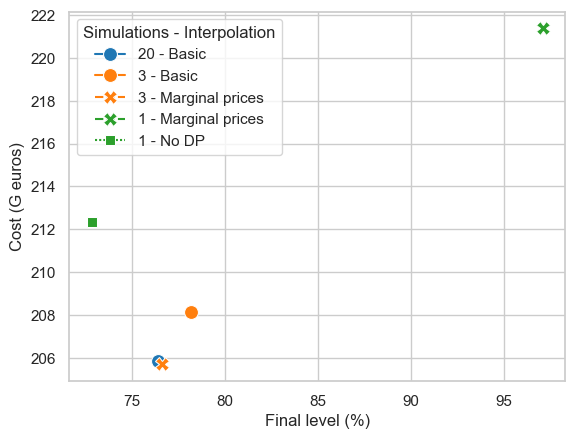

In [105]:
ax = sns.lineplot(x="Final level (%)",y="Cost (G euros)",data=result_mean,hue="Simulations",style="Interpolation",style_order=["Basic","Marginal prices","No DP"],hue_order=['20','3','1'],markers=True, markersize=10)

# create a dictionary mapping the subscales to their color
handles, labels = ax.get_legend_handles_labels()
index_item_title = labels.index('Interpolation')
color_dict = {label: handle.get_color()
              for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

new_handle = [copy(handles[index_item_title+1]),
              copy(handles[index_item_title+1]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+2]),
              copy(handles[index_item_title+3])]
new_handle[0].set_color(color_dict['20'])
new_handle[1].set_color(color_dict['3'])
new_handle[2].set_color(color_dict['3'])
new_handle[3].set_color(color_dict['1'])
new_handle[4].set_color(color_dict['1'])
new_label = ["20 - Basic", "3 - Basic", "3 - Marginal prices", "1 - Marginal prices", "1 - No DP"]
# create a legend only using the items
ax.legend(new_handle, new_label, title='Simulations - Interpolation')